In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import sys
import os

module_path = os.path.abspath(os.path.join('/home/renatochaz/git/economic_policy_uncertainty/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
ds = pd.read_csv(f'{module_path}/global.csv')

In [25]:
inv = ds.copy()
epu = ds.copy()
fbcf = ds.copy()

In [26]:
inv = inv.groupby(['ano'], as_index=False).agg({'inv':'mean'})

In [27]:
epu = epu.groupby(['ano'], as_index=False).agg({'ln_epu':'mean'})

In [28]:
fbcf['fbcf'] = np.log(fbcf['fbcf'])
fbcf = fbcf.groupby(['ano'], as_index=False).agg({'fbcf':'mean'})

In [34]:
pds = inv.join([epu['ln_epu'], fbcf['fbcf']])

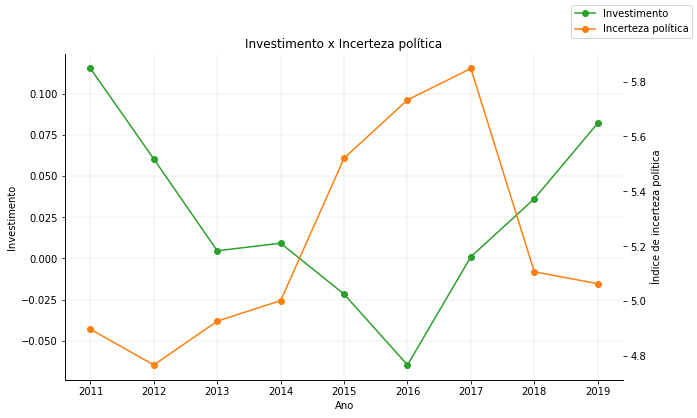

In [108]:
ax = pds.plot(
    x='ano',
    y='inv',
    legend=False,
    label='Investimento',
    marker='o',
    color='#2ca02c'
    )
ax.set(
    title = 'Investimento x Incerteza política',
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='ln_epu',
    ax=ax2,
    legend=False,
    marker='o',
    color='#ff7f0e', 
    figsize=(10,6),
    label='Incerteza política'
    )
ax.figure.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log do índice de incerteza política')
plt.show()

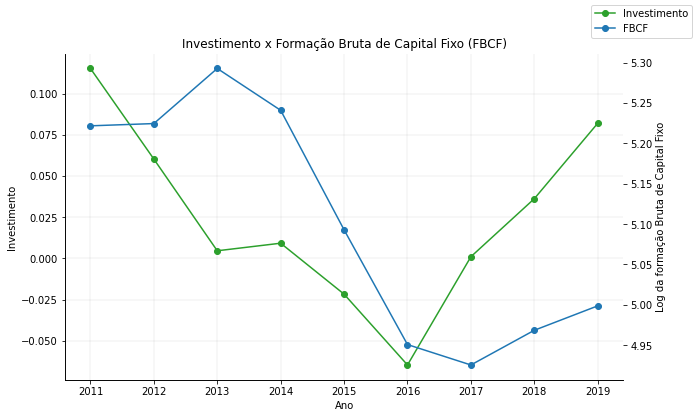

In [109]:
ax = pds.plot(
    x='ano',
    y='inv',
    legend=False,
    label='Investimento',
    marker='o',
    color='#2ca02c'
    )
ax.set(
    title = 'Investimento x Formação Bruta de Capital Fixo (FBCF)',
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='fbcf',
    ax=ax2,
    legend=False,
    marker='o',
    color='C0', 
    figsize=(10,6),
    label='FBCF'
    )
ax.figure.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log da formação Bruta de Capital Fixo')
plt.show()